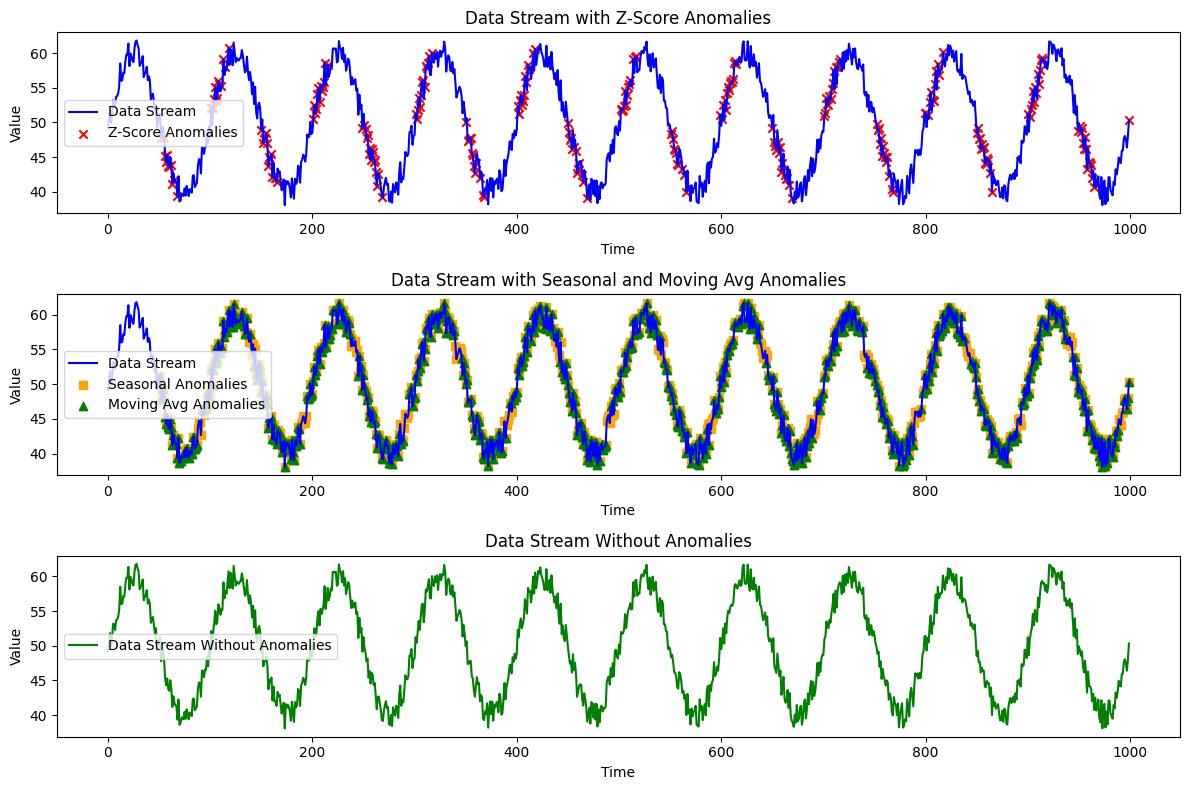

In [20]:
import numpy as np
import random
import matplotlib.pyplot as plt
from collections import deque

# ========================== Functions for Data Stream Simulation ==========================

def simulate_data_stream(length=1000, noise_range=(-5, 5)):
    """
    Simulates a continuous data stream with seasonal patterns and controlled random noise.

    Args:
        length (int): The length of the data stream to generate.
        noise_range (tuple): Range of random noise to add to the data stream.

    Returns:
        list: A list of floating-point numbers representing the data stream.
    """
    data_stream = []
    for i in range(length):
        seasonal_pattern = 10 * np.sin(2 * np.pi * (i % 100) / 100)  # Seasonal pattern
        noise = random.uniform(noise_range[0], noise_range[1])  # Controlled random noise
        value = 50 + seasonal_pattern + noise
        data_stream.append(value)
    return data_stream


# ========================== Anomaly Detection Algorithms ==========================

def detect_anomalies_zscore(data_stream, window_size=50, threshold=2):
    """
    Detects anomalies in a continuous data stream using Z-Score method.

    Args:
        data_stream (list): The stream of data points.
        window_size (int): Size of the sliding window for mean and std calculation.
        threshold (float): The Z-Score threshold to flag anomalies.

    Returns:
        list: A list of tuples containing the index and value of anomalies.
    """
    window = deque(maxlen=window_size)
    anomalies = []

    for i, data_point in enumerate(data_stream):
        if len(window) >= window_size:
            mean = np.mean(window)
            std = np.std(window)
            z_score = (data_point - mean) / std if std != 0 else 0

            if abs(z_score) > threshold:
                anomalies.append((i, data_point))  # Storing index and anomaly value

        window.append(data_point)

    return anomalies

def detect_anomalies_seasonal(data_stream, window_size=50, seasonal_threshold=2):
    """
    Detects seasonal anomalies based on periodic deviations from a seasonal pattern.

    Args:
        data_stream (list): The stream of data points.
        window_size (int): Size of the sliding window to calculate rolling mean.
        seasonal_threshold (float): Threshold for detecting deviations from seasonal pattern.

    Returns:
        list: A list of tuples containing the index and value of seasonal anomalies.
    """
    seasonal_anomalies = []
    for i in range(window_size, len(data_stream)):
        # Compare current value to a seasonal pattern
        seasonal_pattern = 10 * np.sin(2 * np.pi * (i % 100) / 100)
        if abs(data_stream[i] - seasonal_pattern) > seasonal_threshold:
            seasonal_anomalies.append((i, data_stream[i]))
    return seasonal_anomalies

def detect_anomalies_moving_avg(data_stream, window_size=50, threshold=2):
    """
    Detects anomalies using a moving average approach.

    Args:
        data_stream (list): The stream of data points.
        window_size (int): The size of the window for the moving average calculation.
        threshold (float): Threshold for detecting anomalies based on moving average deviation.

    Returns:
        list: A list of tuples containing the index and value of moving average anomalies.
    """
    moving_avg_anomalies = []
    moving_avg = np.convolve(data_stream, np.ones(window_size)/window_size, mode='valid')

    for i in range(window_size, len(data_stream)):
        if abs(data_stream[i] - moving_avg[i - window_size]) > threshold:
            moving_avg_anomalies.append((i, data_stream[i]))

    return moving_avg_anomalies


# ========================== Data Validation & Error Handling ==========================

def validate_input(data_stream, window_size):
    """Validates the input data stream and window size."""
    if not isinstance(data_stream, list) or len(data_stream) == 0:
        raise ValueError("Data stream must be a non-empty list.")
    if not all(isinstance(x, (int, float)) for x in data_stream):
        raise ValueError("All elements in the data stream must be numbers.")
    if not isinstance(window_size, int) or window_size <= 0:
        raise ValueError("Window size must be a positive integer.")


# ========================== Visualization ==========================

def visualize_anomalies(data_stream, anomalies_zscore, anomalies_seasonal, anomalies_moving_avg):
    """
    Visualizes the data stream and anomalies using matplotlib.

    Args:
        data_stream (list): The full data stream to plot.
        anomalies_zscore (list): Detected Z-Score anomalies.
        anomalies_seasonal (list): Detected Seasonal anomalies.
        anomalies_moving_avg (list): Detected Moving Average anomalies.
    """
    plt.figure(figsize=(12, 8))

    # Plot Data Stream with Z-Score anomalies
    plt.subplot(3, 1, 1)
    plt.plot(data_stream, label="Data Stream", color='blue')
    if anomalies_zscore:
        indices_zscore, values_zscore = zip(*anomalies_zscore)
        plt.scatter(indices_zscore, values_zscore, color='red', label="Z-Score Anomalies", marker='x')
    plt.title('Data Stream with Z-Score Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    # Plot Data Stream with Seasonal and Moving Average Anomalies
    plt.subplot(3, 1, 2)
    plt.plot(data_stream, label="Data Stream", color='blue')
    if anomalies_seasonal:
        indices_seasonal, values_seasonal = zip(*anomalies_seasonal)
        plt.scatter(indices_seasonal, values_seasonal, color='orange', label="Seasonal Anomalies", marker='s')
    if anomalies_moving_avg:
        indices_moving_avg, values_moving_avg = zip(*anomalies_moving_avg)
        plt.scatter(indices_moving_avg, values_moving_avg, color='green', label="Moving Avg Anomalies", marker='^')
    plt.title('Data Stream with Seasonal and Moving Avg Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    # Plot Data Stream Without Anomalies
    plt.subplot(3, 1, 3)
    plt.plot(data_stream, color='green', label="Data Stream Without Anomalies")
    plt.title('Data Stream Without Anomalies')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.legend()

    plt.tight_layout()
    plt.show()


# ========================== Main Execution ==========================

# Simulate a data stream
data_stream = simulate_data_stream(1000, noise_range=(-2, 2))

# Validate input
try:
    validate_input(data_stream, window_size=50)
except ValueError as e:
    print(f"Error: {e}")
    exit()

# Detect anomalies using various methods
anomalies_zscore = detect_anomalies_zscore(data_stream, window_size=50, threshold=2)
anomalies_seasonal = detect_anomalies_seasonal(data_stream, window_size=50, seasonal_threshold=2)
anomalies_moving_avg = detect_anomalies_moving_avg(data_stream, window_size=50, threshold=2)

# Visualize the results
visualize_anomalies(data_stream, anomalies_zscore, anomalies_seasonal, anomalies_moving_avg)

